In [1]:
import pygmt
import gsw
import pandas as pd
import numpy as np
import xarray as xr
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import cmocean

In [2]:
def Univ_Diagram(file_1, file_2):
    
    #Df com intervalo de 0.2 para Conservative Temperature (°C) e 0.02 para Absolute Salinity (g/kg)
    #Profundidade de acordo com o caminho da pasta

    #Grid 1
    df = pd.read_parquet(file_1)

    #Divide o volume
    df.vol = df.vol/1e13

    #Retira esses valores mínimos que defini, para não atrapalhar na criação correta da superfície pelo pygmt. Esses valores são devido a criação de um ponto médio para os intervalos, porem como eram pontos minimos e o intervalo a esqueda não está inserido, o pandas cria tipo o intervalo de (-2, -1.98], será (-2.00001, -1.98] fazendo com que a média seja -1.9005, oque pode atrapalhar na criação correta do grid pelo pygmt
    df = df.loc[(df.thetao > -1.9005) & (df.so > 33.0095)]

    #Seleciona a região, importante que seja os mesmos valores minimos e maximos do meu dataframe.
    region = [-1.7, 19.9, 33.03, 36.99]

    grid = pygmt.surface(
        x=df.thetao,
        y=df.so,
        z=df.vol,
        spacing="0.2/0.02",
        region=region,  # xmin, xmax, ymin, ymax
        T=0.50,
        Ll=0,
    )

    #Grid 2
    df = pd.read_parquet(file_2)

    df.vol = df.vol/1e13

    df = df.loc[(df.thetao > -1.9005) & (df.so > 33.0095)]

    grid2 = pygmt.surface(
        x=df.thetao,
        y=df.so,
        z=df.vol,
        spacing="0.2/0.02",
        region=region,  # xmin, xmax, ymin, ymax
        T=0.50,
        Ll=0,
    )

    grid = grid.rename({"y":"so", "x" : "thetao"})
    grid2 = grid2.rename({"y":"so", "x" : "thetao"})
    
    return grid, grid2

## CAMS-CSM1-0

In [3]:
file_1 = "Dataframes_50S_20S/CMIP.CAMS.CAMS-CSM1-0.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.CAMS.CAMS-CSM1-0.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)

C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


In [4]:
x_t1, x_t2, x_s1, x_s2 = 2, 16, 33.7, 36

In [5]:
diff = (grid2 - grid)

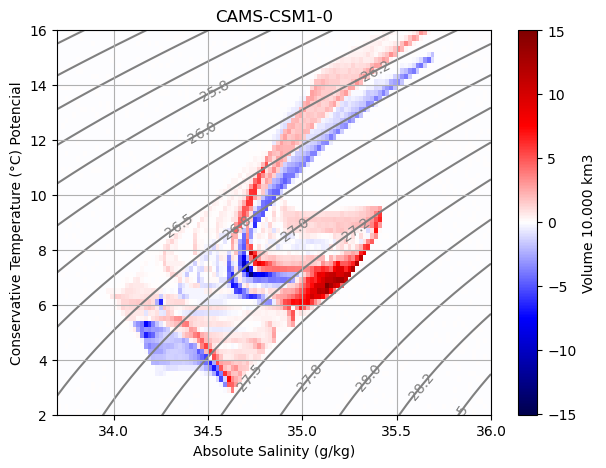

In [6]:
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)')
plt.ylabel('Conservative Temperature (°C) Potencial')
plt.title("CAMS-CSM1-0")
plt.savefig("Imagens_50S_20S/CAMS-CSM1-0.png")
plt.show()

## CESM2

C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


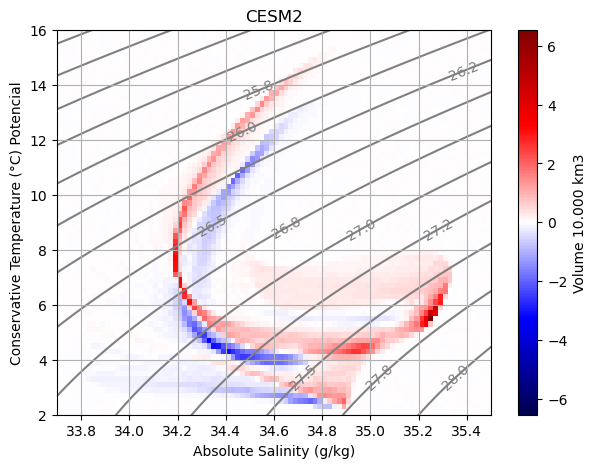

In [7]:
file_1 = "Dataframes_50S_20S/CMIP.NCAR.CESM2.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.NCAR.CESM2.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 16, 33.7, 35.5
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)')
plt.ylabel('Conservative Temperature (°C) Potencial')
plt.title("CESM2")
plt.savefig("Imagens_50S_20S/CESM2.png")
plt.show()

## CNRM

C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


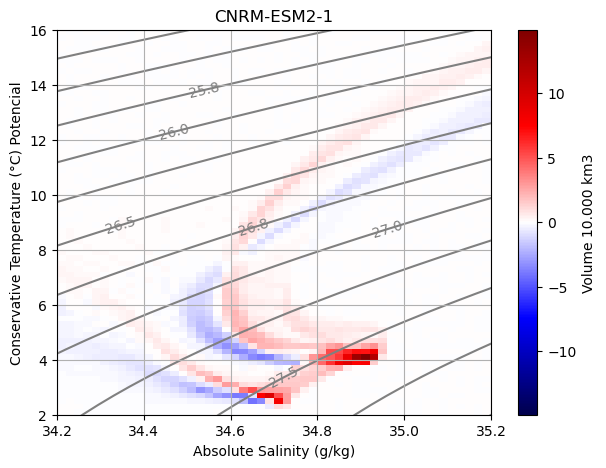

In [8]:
file_1 = "Dataframes_50S_20S/CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 16, 34.2, 35.2
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)')
plt.ylabel('Conservative Temperature (°C) Potencial')
plt.title("CNRM-ESM2-1")
plt.savefig("Imagens_50S_20S/CNRM-ESM2-1.png")
plt.show()

## GFDL-ESM4

C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


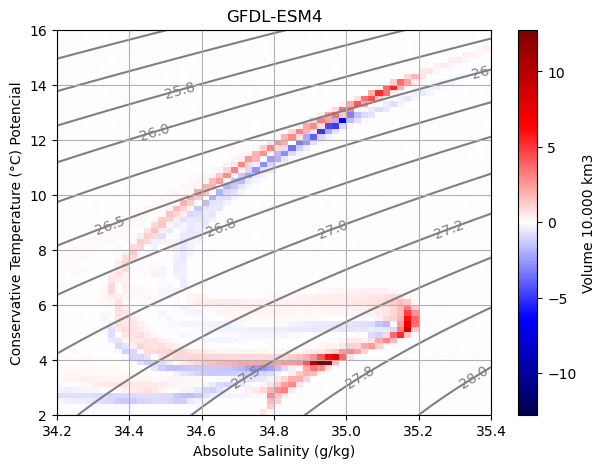

In [9]:
file_1 = "Dataframes_50S_20S/CMIP.NOAA-GFDL.GFDL-ESM4.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 16, 34.2, 35.4
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)')
plt.ylabel('Conservative Temperature (°C) Potencial')
plt.title("GFDL-ESM4")
plt.savefig("Imagens_50S_20S/GFDL-ESM4.png")
plt.show()

## IPSL-CM6A-LR

C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


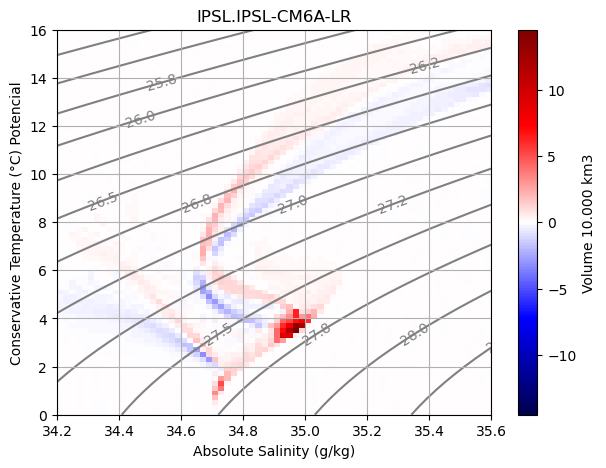

In [10]:
file_1 = "Dataframes_50S_20S/CMIP.IPSL.IPSL-CM6A-LR.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 0, 16, 34.2, 35.6
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)')
plt.ylabel('Conservative Temperature (°C) Potencial')
plt.title("IPSL.IPSL-CM6A-LR")
plt.savefig("Imagens_50S_20S/IPSL.IPSL-CM6A-LR.png")
plt.show()

## MIROC6

C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_31072\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


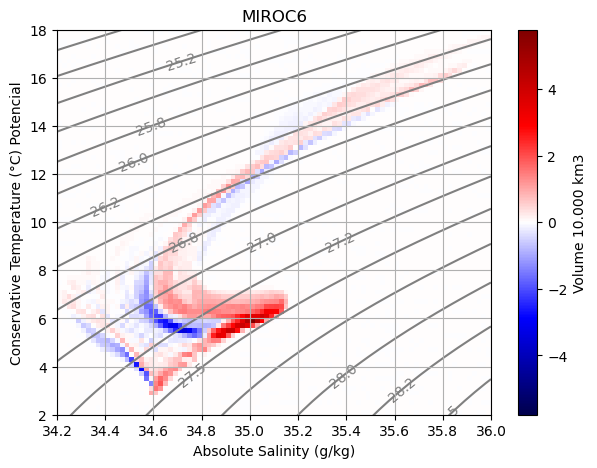

In [11]:
file_1 = "Dataframes_50S_20S/CMIP.MIROC.MIROC6.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.MIROC.MIROC6.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 18, 34.2, 36
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 18)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)')
plt.ylabel('Conservative Temperature (°C) Potencial')
plt.title("MIROC6")
plt.savefig("Imagens_50S_20S/MIROC6.png")
plt.show()